In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

In [2]:
from utils.test_utils import plot_results, load_logs

In [10]:
random_save_dirs = ["../results/simulation/220327_2219",
                "../results/simulation/220327_2250",
                "../results/simulation/220327_2307",
                "../results/simulation/220328_0005",
                "../results/simulation/220328_0023",
                "../results/simulation/220328_0103",
                "../results/simulation/220328_0123",
                "../results/simulation/220328_2342",
                "../results/simulation/220329_0001",
                "../results/simulation/220329_0051"] # random case

entropy_save_dirs = ["../results/simulation/220327_2216",
                "../results/simulation/220327_2248",
                "../results/simulation/220327_2306",
                "../results/simulation/220327_2352",
                "../results/simulation/220328_2340",
                "../results/simulation/220328_2356",
                "../results/simulation/220329_1247",
                "../results/simulation/220329_1304",
                "../results/simulation/220329_1322",
                "../results/simulation/220329_1341"]# entropy

identity_save_dirs = ["../results/simulation/220327_2228",
                "../results/simulation/220327_2244",
                "../results/simulation/220328_2341",
                "../results/simulation/220328_2359",
                "../results/simulation/220329_0023",
                "../results/simulation/220329_0108",
                "../results/simulation/220329_0126",
                "../results/simulation/220329_0147",
                "../results/simulation/220329_1245",
                "../results/simulation/220329_1302"
                ]# identity

bentropy_save_dirs = ["../results/simulation/220327_2247",
                "../results/simulation/220327_2304",
                "../results/simulation/220328_2325",
                "../results/simulation/220328_2343",
                "../results/simulation/220329_1248",
                "../results/simulation/220329_1303",
                "../results/simulation/220329_1320",
                "../results/simulation/220407_1448",
                "../results/simulation/220407_1505",
                "../results/simulation/220407_1523"
                     ] #binary_entropy

In [11]:
import copy
from utils.test_utils import average_performance

In [12]:
random_lossgs, random_accgs, random_losslog, random_acclog = average_performance(random_save_dirs)
entropy_lossgs, entropy_accgs, entropy_losslog, entropy_acclog = average_performance(entropy_save_dirs)
identity_lossgs, identity_accgs, identity_losslog, identity_acclog = average_performance(identity_save_dirs)
bentropy_lossgs, bentropy_accgs, bentropy_losslog, bentropy_acclog = average_performance(bentropy_save_dirs)

load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load ac

In [13]:
import matplotlib.pyplot as plt
from utils.test_utils import plot_compare

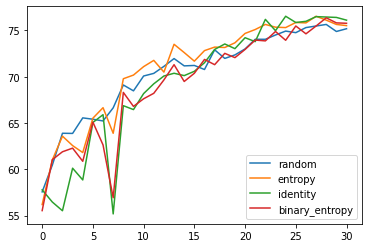

In [14]:
comp_key = 'test_w'
testw = [random_acclog[comp_key],entropy_acclog[comp_key],identity_acclog[comp_key],bentropy_acclog[comp_key]]
# testw = [entropy_acclog[comp_key],identity_acclog[comp_key]]
# testw = [random_losslog[comp_key],entropy_losslog[comp_key],identity_losslog[comp_key],bentropy_losslog[comp_key]]
name_list = ['random','entropy','identity','binary_entropy']
# name_list = ['entropy','identity']
plot_compare(testw,name_list)
# plot_compare([testw[0],testw[3]], [name_list[0],name_list[3]])

load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load ac

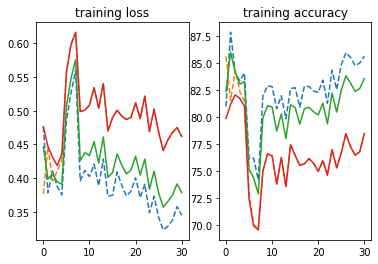

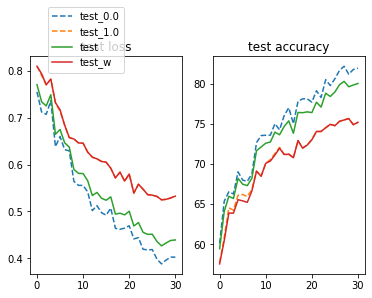

load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load ac

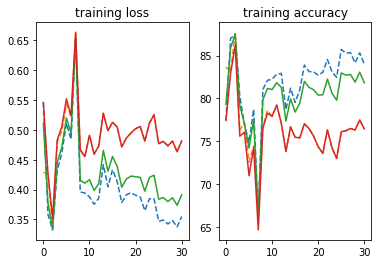

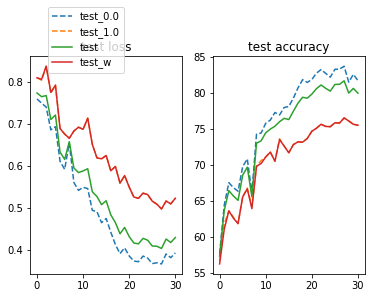

load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load ac

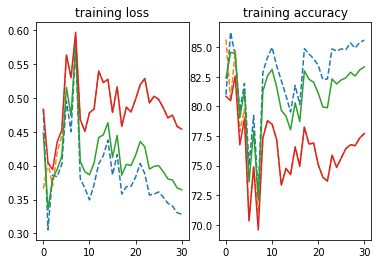

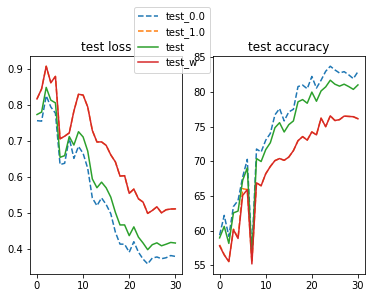

load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load ac

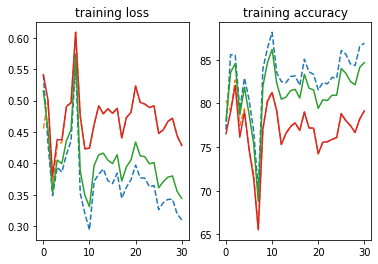

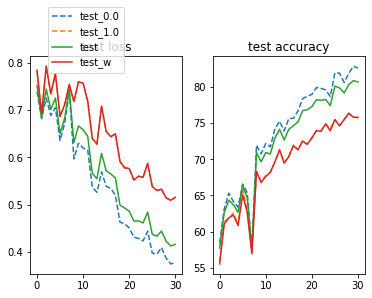

In [15]:
dir_lst = [random_save_dirs,entropy_save_dirs,identity_save_dirs,bentropy_save_dirs]
name_list = ['random','entropy','identity','binary_entropy']
for i,dr in enumerate(dir_lst):    
    lossgs, accgs, losslog, acclog = average_performance(dr)
    print("="*10,name_list[i],"="*10)    
    plot_results(lossgs, accgs, losslog, acclog)
    print("="*30)

In [99]:
from utils.test_utils import plot_results

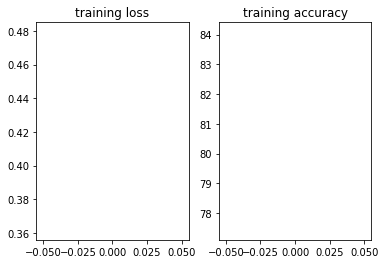

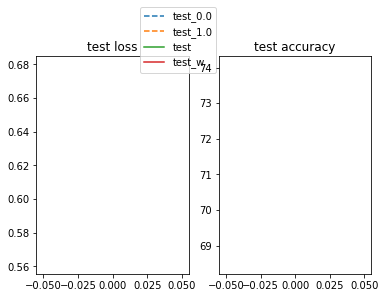

In [100]:
plot_results(lossgs, accgs, losslog, acclog) # random r2

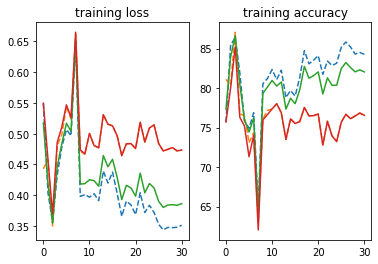

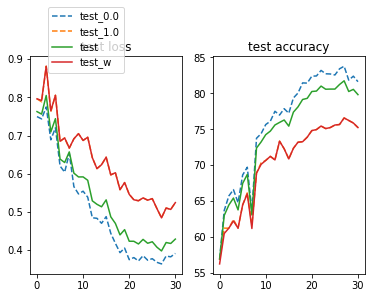

In [13]:
plot_results(lossgs, accgs, losslog, acclog) # entropy r2

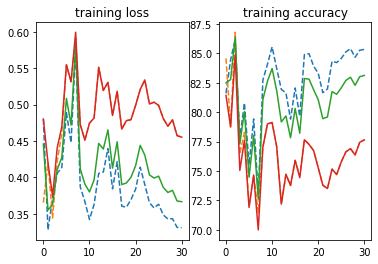

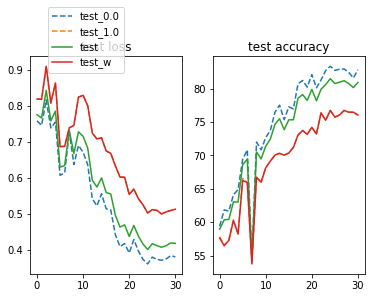

In [10]:
plot_results(lossgs, accgs, losslog, acclog) # identity r2

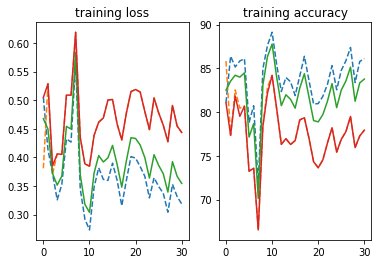

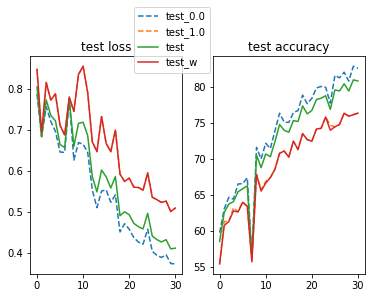

In [7]:
plot_results(lossgs, accgs, losslog, acclog) # binary_entropy

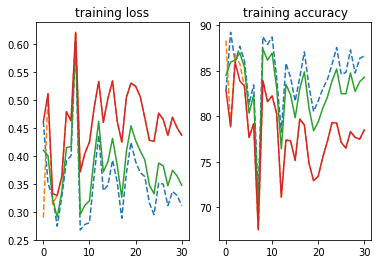

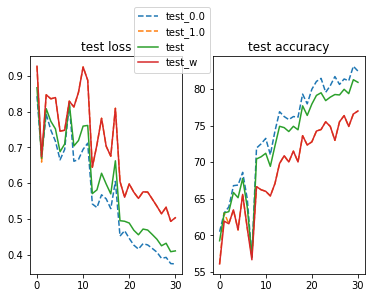

In [44]:
plot_results(lossgs, accgs, losslog, acclog) # binary_entropy (r1)

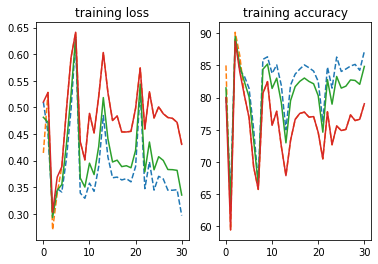

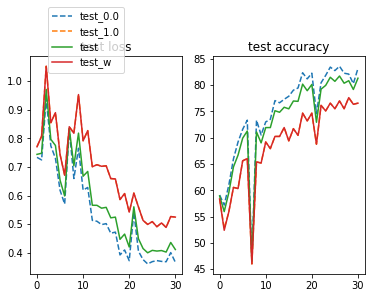

In [41]:
plot_results(lossgs, accgs, losslog, acclog) # identity

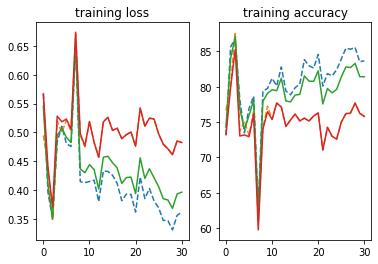

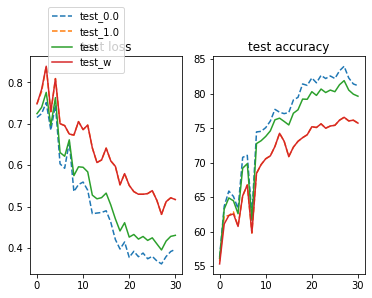

In [38]:
plot_results(lossgs, accgs, losslog, acclog) # entropy

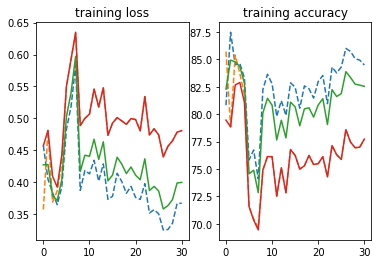

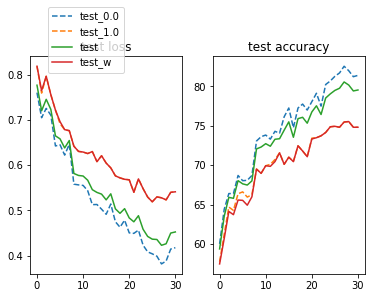

In [34]:
plot_results(lossgs, accgs, losslog, acclog) # random